# Wine Quality
#### Nombre del dataset :  [Wine Quality del UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality)


### Introducción

Este proyecto se centra en el análisis exploratorio de datos (EDA) de un conjunto de datos de calidad del vino, que contiene información sobre vinos rojos y blancos.

### Origen de los Datos

Los datos utilizados en este análisis provienen del Repositorio de Aprendizaje Automático de la UCI (Universidad de California, Irvine). Fueron recopilados por P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis en la Universidade de Minho, Portugal. Estos investigadores recopilaron información sobre diferentes propiedades químicas de vinos y la calidad percibida por catadores expertos.

###  Objetivo del Análisis

El objetivo principal de este análisis es comprender en profundidad el conjunto de datos y extraer información valiosa que pueda ser útil para desarrollar modelos de aprendizaje automático para predecir la calidad del vino en función de sus propiedades químicas. Además de este objetivo central, existen otros objetivos más específicos, que incluyen:

1. Identificar patrones y relaciones entre las características químicas y la calidad del vino.
2. Evaluar la distribución de la calidad del vino.
3. Realizar un análisis exploratorio para revelar insights y tendencias interesantes.

####  Variables en el Conjunto de Datos

El conjunto de datos se divide en dos archivos CSV: uno para vinos rojos y otro para vinos blancos. Cada archivo contiene las siguientes variables con sus respectivas unidades:

####  Variables de Características Químicas (Entradas):

1. `fixed acidity` (g/dm³): Acidez fija.
2. `volatile acidity` (g/dm³): Acidez volátil.
3. `citric acid` (g/dm³): Ácido cítrico.
4. `residual sugar` (g/dm³): Azúcar residual.
5. `chlorides` (g/dm³): Cloruros.
6. `free sulfur dioxide` (mg/dm³): Dióxido de azufre libre.
7. `total sulfur dioxide` (mg/dm³): Dióxido de azufre total.
8. `density` (g/cm³): Densidad.
9. `pH`: pH.
10. `sulphates` (g/dm³): Sulfatos.
11. `alcohol` (% vol): Contenido de alcohol.

### Variable de Calidad (Objetivo):

12. `quality`: Calidad del vino (puntuación de 0 a 10, donde 0 es de muy mala calidad y 10 es excelente de calidad).

### Análisis Exploratorio de Datos - Conjunto de Datos de Calidad del Vino

En las secciones siguientes de este notebook, realizaremos un análisis exhaustivo de estas variables y exploraremos relaciones, tendencias y patrones. Además, se llevarán a cabo visualizaciones gráficas para facilitar la comprensión de los datos.

In [1]:
# Importación de librerías para tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Importación de librerías para gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from tabulate import tabulate

# Importación de librerías para estadística descriptiva
# ==============================================================================
from scipy.stats import shapiro, kstest, anderson
from scipy.stats import describe

# Importación de librerías para métricas y evaluación
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importación de librerías para modelado
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR

In [2]:
# Nombres de las columnas (variables)
column_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

# Datos de vinos rojos
red_wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", names=column_names, header=0)

# Datos de vinos blancos
white_wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", names=column_names, header=0)


### Vinos Blancos (White Wine)
1. **Aspectos Generales**:

In [3]:
X = white_wine_df.drop("quality", axis=1)
y = white_wine_df["quality"]

In [4]:
#Visualización del dataframe
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
#Forma del dataframe
white_wine_df.shape

(4898, 12)

In [6]:
print(white_wine_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
# Aspectos básicos del DataFrame
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
#Examinando datos perdidos
white_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

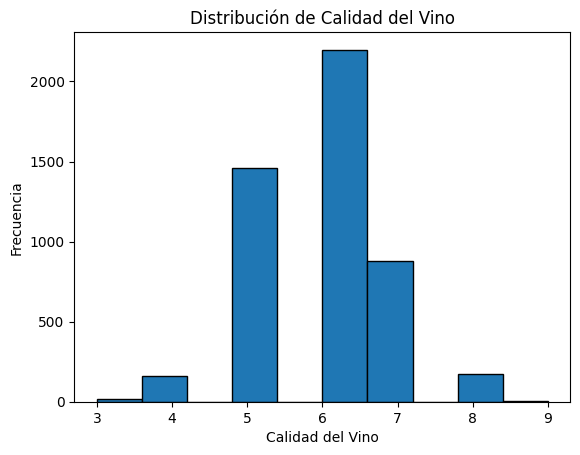

In [9]:
plt.hist(y, bins=10, edgecolor='k')
plt.xlabel('Calidad del Vino')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calidad del Vino')
plt.show()

2. **Estadistica básica: Normalidad del conjuto de datos**:

 2.1 Una forma visual preliminar de verificar la normalidad de tus datos es crear un **histograma**. Si la distribución se asemeja a una campana es simétrica, en este caso lo más probable es que siga una distribución normal, por la forma de campana. De igual manera vemos que tiene leves asimetrias, por lo cual vamos utilizar otros metodos para comprobar su distribución.

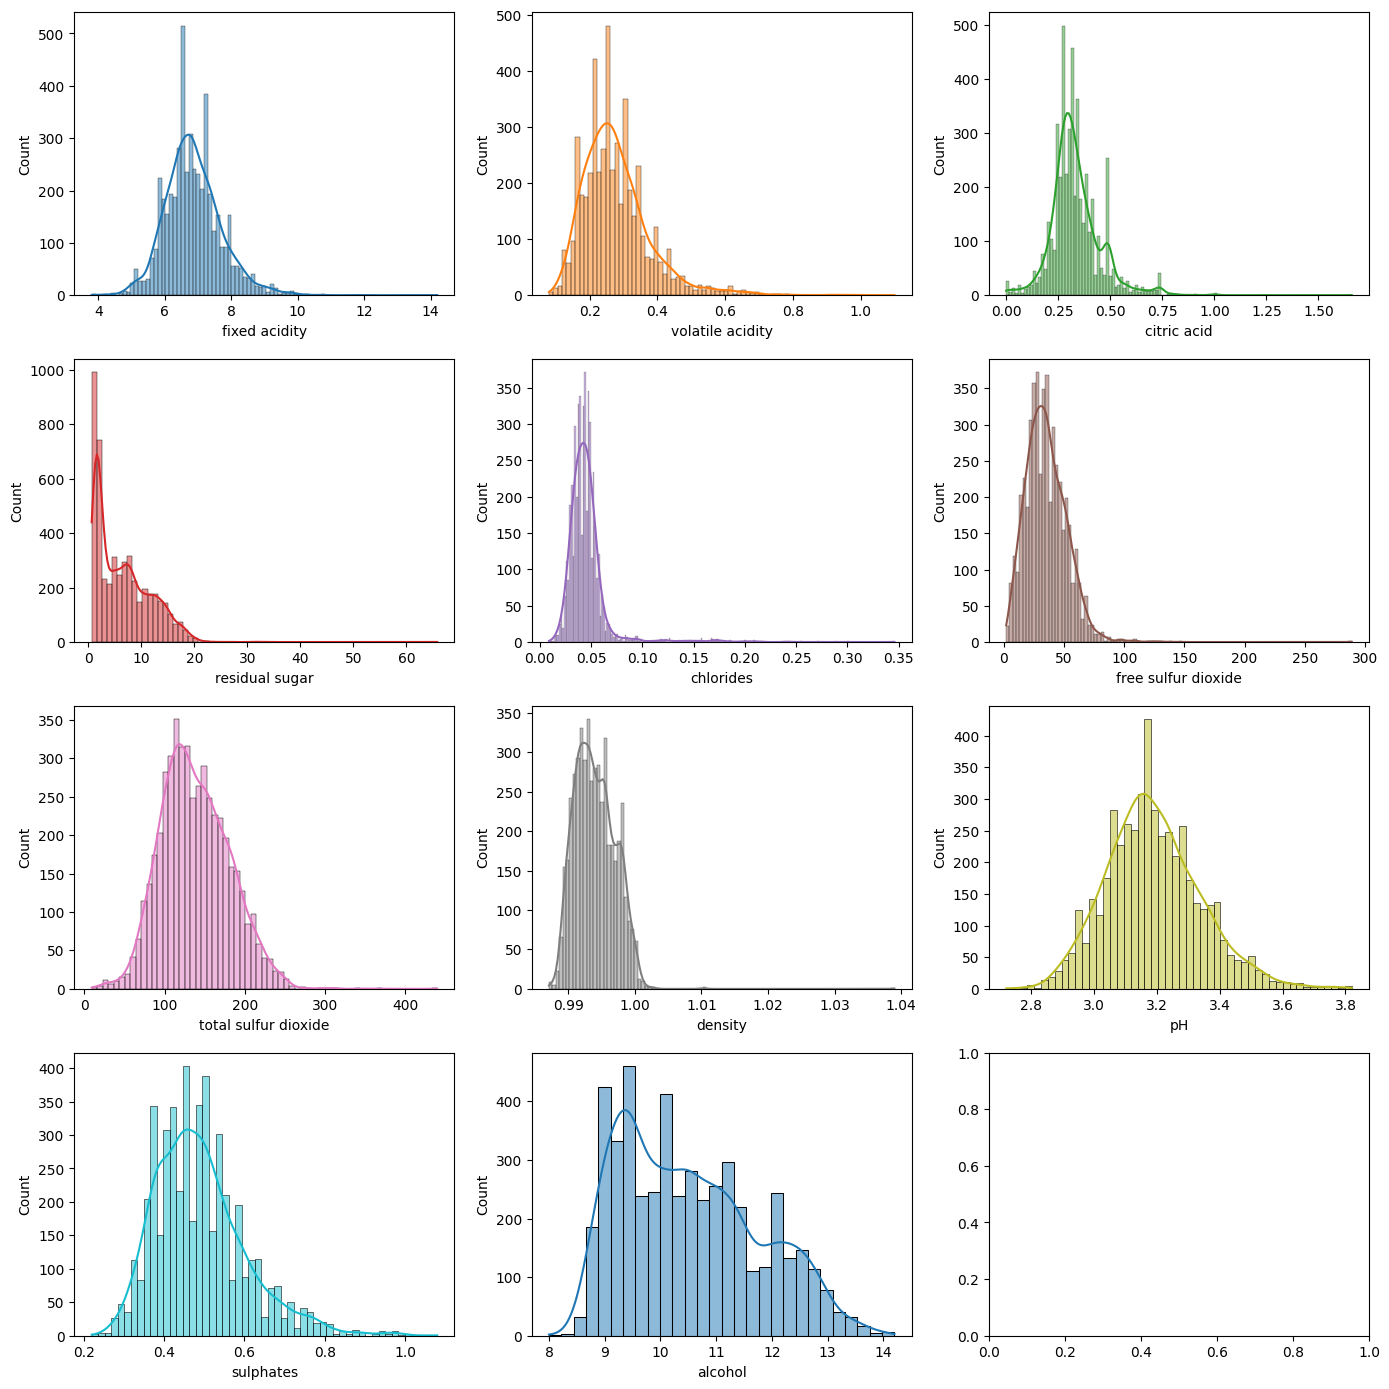

In [10]:
#Construcción de histogramas
import seaborn as sns

fig, axes = plt.subplots(4, 3, figsize=(14, 14))

for i, column in enumerate(column_names[:-1]):
    row = i // 3  # Índice de fila
    col = i % 3   # Índice de columna
    sns.histplot(white_wine_df[column], kde=True, ax=axes[row, col], color= (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"])

plt.tight_layout()
plt.show()


 2.2 _Pruebas de distribución normal_:
Para determinar si el conjunto de datos sigue una distribución normal, utilizaremos la prueba de Anderson-Darling. Esta prueba es más efectiva para detectar desviaciones de la normalidad en las colas largas de la distribución, como se puede observar en los histogramas. Esto significa que puede identificar valores atípicos en las colas con mayor eficacia que la Prueba de Shapiro-Wilk. Además, la Prueba de Shapiro-Wilk funciona bien con tamaños de muestra generalmente inferiores a 2.000 observaciones, mientras que para el conjunto de datos del vino blanco contamos con 4.898 entradas.

Hipótesis nula (H0): Los datos siguen una distribución normal o gaussiana.

Hipótesis alternativa (Ha): Los datos no siguen una distribución normal

In [11]:
# DataFrame para almacenar los resultados
results = pd.DataFrame(columns=["Feature", "Anderson-Darling p-value", "Anderson-Darling Normality", "Skewness", "Skewness Interpretation"])

# nivel de significancia
alpha = 0.05

for feature in column_names:
    data = white_wine_df[feature]

    # Prueba de Anderson-Darling
    anderson_result = anderson(data)
    ad_p = anderson_result.critical_values[2]
    if ad_p > alpha:
        ad_normality = "Se acepta la H0"
    else:
        ad_normality = "Se rechaza la H0"

    # Estadísticas descriptivas
    stats = describe(data)

    #  estadísticas de sesgo
    skewness = stats.skewness
    skewness_interpretation = "Sesgo a la izquierda" if skewness < 0 else "Sesgo a la derecha" if skewness > 0 else "Sin sesgo"

    # Agregar los resultados al DataFrame
    result_df = pd.DataFrame({
        "Feature": [feature],
        "Anderson-Darling p-value": [ad_p],
        "Anderson-Darling Normality": [ad_normality],
        "Skewness": [skewness],
        "Skewness Interpretation": [skewness_interpretation]
    })
    results = pd.concat([results, result_df], ignore_index=True)

results

,Feature,Anderson-Darling p-value,Anderson-Darling Normality,Skewness,Skewness Interpretation
0,fixed acidity,0.786,Se acepta la H0,0.647553,Sesgo a la derecha
1,volatile acidity,0.786,Se acepta la H0,1.576497,Sesgo a la derecha
2,citric acid,0.786,Se acepta la H0,1.281528,Sesgo a la derecha
3,residual sugar,0.786,Se acepta la H0,1.076764,Sesgo a la derecha
4,chlorides,0.786,Se acepta la H0,5.021792,Sesgo a la derecha
5,free sulfur dioxide,0.786,Se acepta la H0,1.406314,Sesgo a la derecha
6,total sulfur dioxide,0.786,Se acepta la H0,0.390590,Sesgo a la derecha
7,density,0.786,Se acepta la H0,0.977474,Sesgo a la derecha
8,pH,0.786,Se acepta la H0,0.457642,Sesgo a la derecha
9,sulphates,0.786,Se acepta la H0,0.976894,Sesgo a la derecha


Los **resultados** de la Evaluación de Normalidad indicaron que se encontraron distribuciones normales, lo cual respalda la aceptación de la hipótesis nula.

2. 3 _Matriz de correlación_:
Realizamos esta tarea para descubrir las posibles conexiones entre las variables y entender cómo pueden llegar a afectar el desempeño del algoritmo. Esto nos ayuda a elegir las características de manera más eficaz, identificar y reducir posibles problemas de multicolinealidad, y mejorar en general la configuración del modelo.

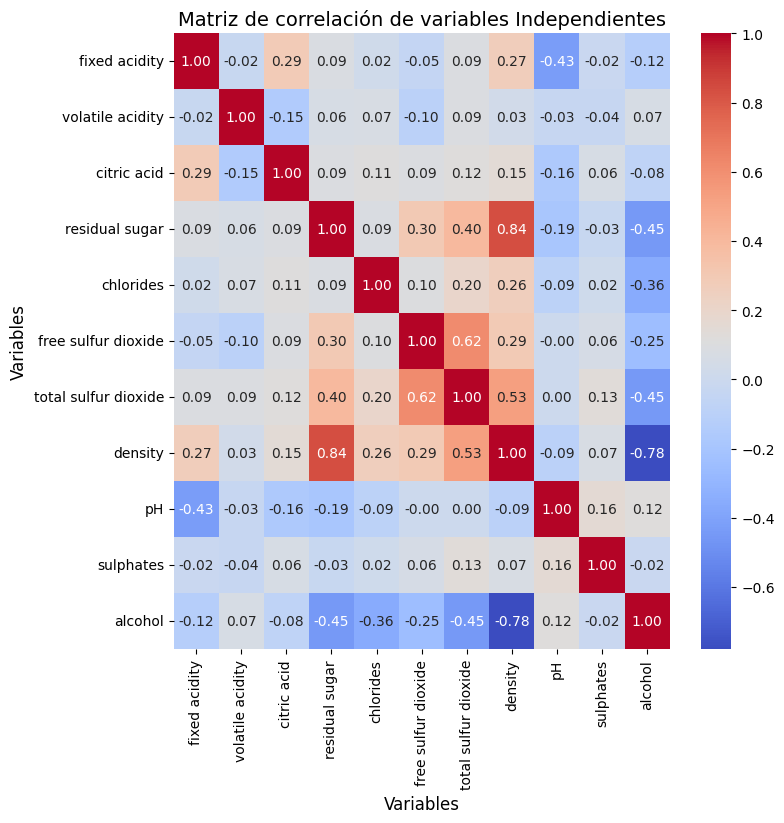

In [12]:
import seaborn as sns

# matriz de correlación de variables independientes
x_correlation_matrix = X.corr()


plt.figure(figsize=(8, 8))
sns.heatmap(x_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de variables Independientes", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# los ejes x e y
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)


plt.show()

In [13]:
classification = []

for attribute in x_correlation_matrix.columns:
    for other_attribute, correlation in x_correlation_matrix[attribute].items():
        if attribute != other_attribute:
            if abs(correlation)> 0.75:
                classification.append((attribute, other_attribute, correlation, "Alta correlación"))
            elif abs(correlation) >0.3:
                classification.append((attribute, other_attribute, correlation, "Moderada correlación"))

headers = ["Atributo 1", "Atributo 2", "Correlación", "Clasificación"]
table = tabulate(classification, headers=headers, tablefmt="fancy_grid")
print(table)

╒══════════════════════╤══════════════════════╤═══════════════╤══════════════════════╕
│ Atributo 1           │ Atributo 2           │   Correlación │ Clasificación        │
╞══════════════════════╪══════════════════════╪═══════════════╪══════════════════════╡
│ fixed acidity        │ pH                   │     -0.425858 │ Moderada correlación │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ residual sugar       │ total sulfur dioxide │      0.401439 │ Moderada correlación │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ residual sugar       │ density              │      0.838966 │ Alta correlación     │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ residual sugar       │ alcohol              │     -0.450631 │ Moderada correlación │
├──────────────────────┼──────────────────────┼───────────────┼──────────────────────┤
│ chlorides            │ alcohol           

**Conclusión** : Se han identificado un par de variables con correlaciones altas, indicando una posible multicolinealidad. Una estrategia para abordar esto es eliminar una de las variables. En este caso, "residual sugar" y "density" muestran una correlación estadísticamente significativa. No obstante, antes de proceder con la eliminación de alguna de las variables, es importante entender la relevancia de cada variable dentro del problema. Ya que en ocasiones, estas variables pueden proporcionar información única y ser valiosas para el aprendizaje del modelo. Para evaluar esto, llevaremos a cabo un análisis de importancia de características o consideraremos el conocimiento del dominio.

In [14]:
# Datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. 5 _Análisis de importancia de características_:

In [15]:
# Crea un modelo Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Ajusta el modelo
clf.fit(X_train, y_train)

# puntuaciones de importancia
importances = clf.feature_importances_

# importancias con los nombres de las características
feature_importance = list(zip(X.columns, importances))

# Ordena por su importancia
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

#características y sus puntuaciones de importancia
for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: alcohol, Importance: 0.1132
Feature: density, Importance: 0.1064
Feature: volatile acidity, Importance: 0.1020
Feature: free sulfur dioxide, Importance: 0.0946
Feature: total sulfur dioxide, Importance: 0.0914
Feature: residual sugar, Importance: 0.0890
Feature: pH, Importance: 0.0846
Feature: chlorides, Importance: 0.0827
Feature: citric acid, Importance: 0.0808
Feature: sulphates, Importance: 0.0787
Feature: fixed acidity, Importance: 0.0766


**Conclusión**:
La **importancia de las características** nos indica qué tan influyentes son las características en el proceso de clasificación del modelo. Cuanto mayor sea el valor, más influencia tiene esa característica o atributo dentro del mismo, los resultados nos arrojaron:

- **Alcohol** es la característica más importante, con una importancia de aproximadamente 0.1132. Se concluye que el alcohol es la característica más influyente en la clasificación.
- **Density** es la segunda característica más importante, con una importancia de aproximadamente 0.1064.
- **Volatile acidity** es la tercera característica más importante, con una importancia de aproximadamente 0.1020.

In [16]:
# Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos (excluyendo MultinomialNB)
models = [
    ("Árbol de Decisión", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("K-NN", KNeighborsClassifier())
]

# Entrenar y evaluar modelos
results = {}

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'std_dev': np.std(y_pred == y_test)  # Calcula la desviación estándar
    }

# Imprimir resultados
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.2f}, Desviación estándar = {metrics['std_dev']:.2f}")

best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"El mejor modelo es: {best_model_name}")


Árbol de Decisión: Accuracy = 0.61, Desviación estándar = 0.49
Random Forest: Accuracy = 0.69, Desviación estándar = 0.46
SVM: Accuracy = 0.56, Desviación estándar = 0.50
K-NN: Accuracy = 0.54, Desviación estándar = 0.50
El mejor modelo es: Random Forest


**Conclusión:**

- **Modelo: Árbol de Decisión**

  _Precisión_: con valores del 62% y una desviación estándar de 0.48%. La desviación estándar indica una variabilidad moderada, lo cual sugiere una aceptable consistencia en las predicciones.

- **Modelo: Random Forest**

  _Precisión_: Con valores del 69% y una desviación estándar de 0.46%. Este modelo ha demostrado una mayor precisión en la clasificación de la calidad del vino en comparación con el modelo anterior, sugiriendo una mayor consistencia en sus predicciones en comparación con los modelos anteriores.

- **Modelo: SVM (Support Vector Machine)**

  _Precisión_: con valores del 56% y una desviación estándar de 0.50%. Esto indica que el modelo acertó en su predicción de la calidad del vino en aproximadamente el 56% de los casos. Sin embargo, la desviación estándar de 0.50% sugiere que el rendimiento del modelo puede variar en alrededor de 0.50%, indicando una variabilidad significativa en las predicciones que podría afectar la consistencia del modelo en diferentes situaciones.

- **Modelo: K-NN (K-Nearest Neighbors)**

  _Precisión_: con valores del 54% y una desviación estándar de 0.50%. Donde el modelo acertó en su predicción de la calidad del vino en aproximadamente el 54% de los casos. Similar al modelo SVM, la desviación estándar de 0.50% sugiere que el rendimiento del modelo puede variar en alrededor de 0.50%. Esta variabilidad en las predicciones impacta la consistencia del modelo, ya que las predicciones pueden ser menos predecibles en diferentes circunstancias.

En resumen, el **modelo Random Forest** sigue siendo el **más eficaz** en la clasificación de la calidad del vino, con la precisión más alta en comparación a alos otros modelos.

Ahora que sabemos que el mejor modelo es **Random Forest**, vamos a hacer hincapié y mejorar ciertos aspectos. Empezaremos por estandarizar los datos antes de entrenar el modelo para mejorar su la estabilidad, convergencia y rendimiento, garantizando que las características tengan una escala coherente. Estas mejoras son particularmente relevantes cuando se trabaja con algoritmos sensibles a las diferencias en las escalas de las características

In [17]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# Random Forest
best_model = RandomForestClassifier(random_state=42)

best_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = best_model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Calcular la desviación estándar
std_dev = np.std(y_pred == y_test)
print(f"Desviación estándar en el conjunto de prueba: {std_dev:.2f}")

# Generar el informe de clasificación
report = classification_report(y_test, y_pred, zero_division=1)

print("Informe de Clasificación:")
print(report)



Precisión en el conjunto de prueba: 0.69
Desviación estándar en el conjunto de prueba: 0.46
Informe de Clasificación:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         5
           4       0.56      0.20      0.29        25
           5       0.70      0.70      0.70       291
           6       0.66      0.79      0.72       432
           7       0.76      0.58      0.66       192
           8       0.80      0.46      0.58        35

    accuracy                           0.69       980
   macro avg       0.75      0.45      0.49       980
weighted avg       0.70      0.69      0.68       980



_**Conclusión**_: No vemos cambios en los valores que arrojo el modelo, pero vamos analizar las otras metricas:

1. **Precisión en el conjunto de prueba: 0.69**
   - La precisión del modelo es del 69%, lo cual indica la proporción de instancias clasificadas correctamente.

2. **Desviación estándar en el conjunto de prueba: 0.46**
   - La desviación estándar mide la dispersión de los valores. En este caso, la desviación estándar relativamente alta (0.46) en el conjunto de prueba puede sugerir cierta variabilidad en el rendimiento del modelo para diferentes conjuntos de datos de prueba.

3. **Informe de Clasificación:**

      - **Clase 3:**
         - La precisión es del 100%, pero el recall es muy bajo (0%), lo que indica que el modelo tiene dificultades para identificar correctamente las instancias de esta clase.
      - **Clase 4:**
         - La precisión es del 56%, lo que indica que el 56% de las predicciones positivas son correctas. El recall es del 20%, lo que sugiere que hay instancias de esta clase que el modelo no está capturando adecuadamente.

      - **Clase 5:**
         - La precisión y el recall son razonablemente buenos (70%), indicando que el modelo tiene un buen rendimiento en esta clase.

      - **Clase 6:**
         - Tanto la precisión como el recall son aceptables (66% y 79% respectivamente). El modelo tiende a clasificar bien las instancias de esta clase.

      - **Clase 7:**
         - La precisión es del 76%, pero el recall es del 58%. El modelo tiene un rendimiento decente, pero podría mejorar en la identificación de todas las instancias positivas de esta clase.

      - **Clase 8:**
         - La precisión es alta (80%), pero el recall es bajo (46%). El modelo tiende a ser preciso al predecir esta clase, pero deja de capturar algunas instancias.

4. **Métricas globales:**
   - **Accuracy (exactitud):** 69%. Representa la proporción de instancias correctamente clasificadas en todas las clases.
   - **Macro AVG:** Representa la media no ponderada de precision, recall y f1-score para todas las clases. En este caso, es 0.75 para precision, 0.45 para recall, y 0.49 para f1-score.
   - **Weighted AVG:** Similar al macro AVG, pero ponderado por el número de instancias en cada clase. En este caso, la precisión ponderada es del 70%, recall ponderado es del 69%, y f1-score ponderado es del 68%.


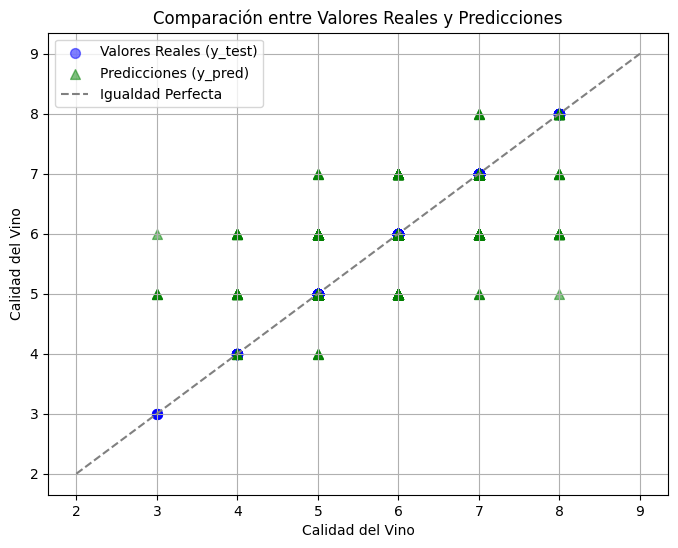

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Valores Reales (y_test)', marker='o', s=50)
plt.scatter(y_test, y_pred, alpha=0.5, color='green', label='Predicciones (y_pred)', marker='^', s=50)

plt.xlabel('Calidad del Vino')
plt.ylabel('Calidad del Vino')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.grid(True)
plt.legend()

plt.plot([2, 9], [2, 9], color='gray', linestyle='--', label='Igualdad Perfecta')
plt.legend()
plt.show()

Este gráfico que representa los valores reales (y_test) en azul (círculos) y las predicciones (y_pred) en verde (triángulos) proporciona una forma visual de comparar cómo se relacionan las predicciones del modelo con los valores reales.




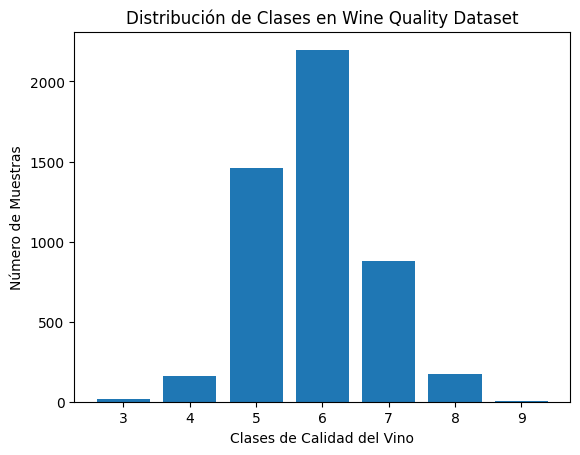

In [19]:
import matplotlib.pyplot as plt

y_classes, class_counts = np.unique(y, return_counts=True)

plt.bar(y_classes, class_counts)
plt.xlabel('Clases de Calidad del Vino')
plt.ylabel('Número de Muestras')
plt.title('Distribución de Clases en Wine Quality Dataset')
plt.xticks(y_classes)
plt.show()


In [20]:
y_classes, class_counts = np.unique(y, return_counts=True)

for y_class, count in zip(y_classes, class_counts):
    print(f'Clase {y_class}: {count} instancias')

Clase 3: 20 instancias
Clase 4: 163 instancias
Clase 5: 1457 instancias
Clase 6: 2198 instancias
Clase 7: 880 instancias
Clase 8: 175 instancias
Clase 9: 5 instancias


Al analizar el numero de instancias de la variable dependiente (Calidad del Vino) sobre algunas de las observaciones previas temos que:

1. **Clase 3: 20 instancias**
   - Con solo 20 instancias, la precisión fue del 100% pero un recall del 0% tiene más sentido. Ya que falta de datos puede hacer que el modelo tenga dificultades para aprender patrones representativos de esta clase.

2. **Clase 4: 163 instancias**
   - Con 163 instancias, la precisión del 56% y el recall del 20% indican que el modelo tiene dificultades para identificar correctamente la mayoría de las instancias de esta clase pero al tener más muestras va aumentando su valor.

3. **Clase 5: 1457 instancias**
   - Con un número significativo de instancias (1457), la precisión y el recall del 70% sugieren un rendimiento razonable en esta clase.

4. **Clase 6: 2198 instancias**
   - El modelo tiene un rendimiento aceptable en esta clase, con una precisión del 66% y un recall del 79%. Dado el número considerable de instancias, el modelo tiene un buen desempeño .

5. **Clase 7: 880 instancias**
   - La precisión del 76% y el recall del 58% sugieren un rendimiento decente en esta clase, pero hay margen para mejorar, especialmente en el recall.

6. **Clase 8: 175 instancias**
   - La alta precisión del 80% y el recall bajo del 46% indican que el modelo tiende a ser preciso al predecir esta clase, pero no logra identificar todas las instancias.

La interpretación anterior se mantiene, pero ahora con el contexto del desequilibrio de clase, entendemos que las clases con un número menor de instancias pueden presentar desafíos para el modelo, y podrían ser necesarias estrategias como el aumento de datos, el submuestreo o el ajuste de pesos de clase para abordar este problema.

Además, al considerar la métrica macro AVG y weighted AVG, estas métricas también reflejan el impacto del desequilibrio de clases en el rendimiento general del modelo. La precisión ponderada (weighted AVG) se ve afectada por el desequilibrio de clases, ya que las clases más grandes tienen un impacto mayor en esta métrica.

### **_Conclusiones preliminares_** :

1. **Clases Mayoritarias:** Debido al desequilibrio de clases, el modelo tiene una cantidad mucho mayor de ejemplos de las clases "5" y "6" en comparación con otras clases. Esto hace que el modelo tenga más información sobre estas clases, por lo que puede ser más preciso al predecirlas. Esto se refleja en los altos valores de precisión y recall para las clases "5" y "6".

2. **Clases Minoritarias:** Por otro lado, las clases minoritarias, como "3", "4", "7", "8" y "9", tienen menos ejemplos en el conjunto de datos. Esto hace que el modelo tenga menos información para aprender y predecir estas clases, lo que se traduce en valores más bajos de precisión y recall para estas clases.

3. **Impacto en el Promedio Ponderado:** El promedio ponderado de todas las métricas se ve influenciado por el desequilibrio de clases. Dado que las clases "5" y "6" tienen muchas más muestras que las clases minoritarias, su impacto es mayor en el promedio ponderado. Esto significa que el rendimiento del modelo en las clases minoritarias puede no reflejarse tan claramente en el promedio ponderado.

4. **Contexto del Problema:** En algunos casos, el desequilibrio de clases puede ser natural en un problema de clasificación. Por ejemplo, en el caso del vino, es más común encontrar vinos de calidad "5" y "6" que de calidad "3" o "9".


# **Estrategias para mejora el modelo:**

- Dado el desequilibrio de clases, podrías considerar estrategias de manejo de desequilibrio, como oversampling o undersampling de clases minoritarias, para mejorar el rendimiento del modelo en las clases desequilibradas.
- La ingeniería de características y la búsqueda de hiperparámetros podrían ayudar a mejorar aún más el rendimiento del modelo.
- Podrías evaluar otros modelos de clasificación y ajustar sus hiperparámetros para determinar si hay un modelo más adecuado para este conjunto de datos específico.
- Un análisis de residuos podría ayudarte a entender mejor las predicciones erróneas del modelo y cómo se pueden abordar.

La estrategia más útil sería el oversampling de las clases minoritarias. Dado que las clases "3", "4", "7", "8" y "9" tienen menos instancias que las clases mayoritarias, aumentar el número de muestras en estas clases puede ayudar al modelo a aprender de manera más equitativa y mejorar su rendimiento en las clases desequilibradas.

In [21]:
from imblearn.over_sampling import RandomOverSampler

# instancia del resampler
oversampler = RandomOverSampler(random_state=42)

# Aplica el resampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)



In [22]:

# datos en entrenamiento y prueba
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# modelo RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)


y_pred_balanced = model.predict(X_test)

# predicciones probabilísticas
y_pred_prob = model.predict_proba(X_test)

# desviación estándar
std_deviation = y_pred_prob.std()

# precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred_balanced)
print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')

# Informe de clasificación
report = classification_report(y_test, y_pred_balanced)
print('Informe de Clasificación:')
print(report)

# desviación estándar
print(f'Desviación estándar de las predicciones probabilísticas: {std_deviation:.2f}')


Precisión en el conjunto de prueba: 0.92
Informe de Clasificación:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       363
           4       0.99      1.00      1.00       338
           5       0.78      0.88      0.83       346
           6       0.81      0.66      0.73       375
           7       0.89      0.94      0.91       383
           8       0.99      1.00      1.00       332
           9       0.99      1.00      1.00       336

    accuracy                           0.92      2473
   macro avg       0.92      0.93      0.92      2473
weighted avg       0.92      0.92      0.92      2473

Desviación estándar de las predicciones probabilísticas: 0.32


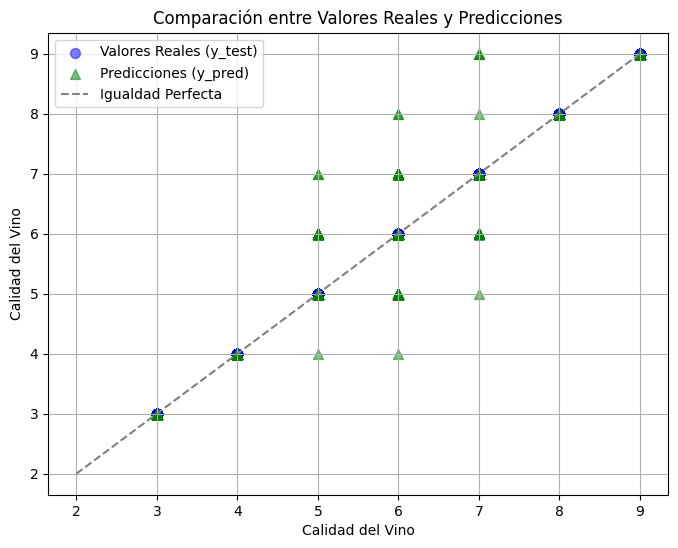

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Valores Reales (y_test)', marker='o', s=50)
plt.scatter(y_test, y_pred_balanced, alpha=0.5, color='green', label='Predicciones (y_pred)', marker='^', s=50)

plt.xlabel('Calidad del Vino')
plt.ylabel('Calidad del Vino')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.grid(True)
plt.legend()

plt.plot([2, 9], [2, 9], color='gray', linestyle='--', label='Igualdad Perfecta')
plt.legend()
plt.show()

## **Discución**

En esta discusión, se buscó simular los desafíos que pueden surgir al trabajar con un conjunto de datos y se exploraron diversos mecanismos para mejorar su rendimiento. Se llevó la aplicación de varios modelos de clasificación, como Árboles de Decisión, Random Forest, SVM y K-NN, sobre el conjunto de datos de calidad de vino blanco de Wine Quality UCI.

Los resultados revelaron que el desbalance de clases en el conjunto de datos tuvo un impacto significativo en la precisión de los modelos, siendo las clases mayoritarias las que presentaron un mejor rendimiento. Para hacer frente a este desbalance, se implementó la estrategia de oversampling, la cual condujo a una mejora sustancial en la precisión del modelo Random Forest, elevándola de 0.69 a 0.92 en el conjunto de prueba y de pasar a una desvación estandar de 0.46 a 0.32.

La elección de estos modelos específicos se basó en su capacidad para manejar datos multidimensionales y su disponibilidad en bibliotecas de aprendizaje automático ampliamente utilizadas. Es importante destacar que las diferencias metodológicas entre el enfoque propuesto y el estudio de referencia se centran en las estrategias de preprocesamiento y la evaluación de modelos. Aunque ambos estudios emplearon algoritmos similares, las estrategias metodológicas y los resultados variaron debido a las adaptaciones realizadas según las necesidades específicas de cada investigación.

Este estudio subraya la importancia de abordar el desbalance de clases en conjuntos de datos y de ajustar la metodología según las características particulares del problema de clasificación. La adaptación de estrategias de preprocesamiento y evaluación es esencial para lograr resultados más precisos y relevantes en el ámbito de la clasificación de datos.
